<a href="https://colab.research.google.com/github/bengy124/Antimicrobial-Peptide-QSAR/blob/main/Antimicrobial_Peptide_QSAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import subprocess
import sys

In [ ]:
drive.mount('/content/gdrive/',force_remount=True)

Mounted at /content/gdrive/


In [ ]:
#Installing Conda
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-12-09 01:28:27--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’

Miniconda3-py37_4.8 100%[===================>]  81.12M   132MB/s    in 0.6s    

2023-12-09 01:28:28 (132 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=p

In [ ]:
#Obtaining datasets
!wget https://raw.githubusercontent.com/dataprofessor/AMP/main/train_po.fasta
!wget https://raw.githubusercontent.com/dataprofessor/AMP/main/train_ne.fasta

--2023-12-09 01:28:46--  https://raw.githubusercontent.com/dataprofessor/AMP/main/train_po.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52619 (51K) [text/plain]
Saving to: ‘train_po.fasta.1’

train_po.fasta.1    100%[===================>]  51.39K  --.-KB/s    in 0.01s   

2023-12-09 01:28:46 (3.41 MB/s) - ‘train_po.fasta.1’ saved [52619/52619]

--2023-12-09 01:28:46--  https://raw.githubusercontent.com/dataprofessor/AMP/main/train_ne.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57206 (56K) [text/plain]
Saving to:

In [ ]:
#Installing CD-Hit to filter redundancies in peptides
!conda install -c bioconda cd-hit -y

Solving environment: | / - done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cd-hit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.08.22 |       h06a4308_0         123 KB
    cd-hit-4.8.1               |       hdbcaa40_0         221 KB  bioconda
    certifi-2020.6.20          |     pyhd3eb1b0_3         155 KB
    openssl-1.1.1w             |       h7f8727e_0         3.7 MB
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following NEW packages will be INSTALLED:

  cd-hit             bioconda/linux-64::cd-hit-4.8.1-hdbcaa40_0

The following packages wi

In [ ]:
#Usage of CD-Hit
!cd-hit -h

		====== CD-HIT version 4.8.1 (built on Mar  1 2019) ======

Usage: cd-hit [Options] 

Options

   -i	input filename in fasta format, required, can be in .gz format
   -o	output filename, required
   -c	sequence identity threshold, default 0.9
 	this is the default cd-hit's "global sequence identity" calculated as:
 	number of identical amino acids or bases in alignment
 	divided by the full length of the shorter sequence
   -G	use global sequence identity, default 1
 	if set to 0, then use local sequence identity, calculated as :
 	number of identical amino acids or bases in alignment
 	divided by the length of the alignment
 	NOTE!!! don't use -G 0 unless you use alignment coverage controls
 	see options -aL, -AL, -aS, -AS
   -b	band_width of alignment, default 20
   -M	memory limit (in MB) for the program, default 800; 0 for unlimitted;
   -T	number of threads, default 1; with 0, all CPUs will be used
   -n	word_length, default 5, see user's guide for choosing it
   -l	length of thr

In [ ]:
!cd-hit -i train_ne.fasta -o train_ne.filtered.fasta
!cd-hit -i train_po.fasta -o train_po.filtered.fasta

Program: CD-HIT, V4.8.1, Mar 01 2019, 14:14:47
Command: cd-hit -i train_ne.fasta -o train_ne.filtered.fasta

Started: Sat Dec  9 01:29:02 2023
                            Output                              
----------------------------------------------------------------
total seq: 1445
longest and shortest : 30 and 11
Total letters: 30071
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 10M = 10M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 76M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 90485331

comparing sequences from          0  to       1445
.
     1445  finished       1280  clusters

Approximated maximum memory consumption: 76M
writing new database
writing clustering information
program completed !

Total CPU time 0.08
Program: CD-HIT, V4.8.1, Mar 01 2019, 14:14:47
Command: cd-hit -i train_po.fasta -o train_po.filter

In [ ]:
#Before and after filtering of peptides count
!grep ">" train_po.fasta | wc -l
!grep ">" train_po.filtered.fasta | wc -l
!grep ">" train_ne.fasta | wc -l
!grep ">" train_ne.filtered.fasta | wc -l

1529
1077
1529
1280


In [ ]:
#Installing Pfeature to calculate and quantify the molecular properties of a peptide
!pip install pfeature

  Using cached pfeature-1.4-py3-none-any.whl (131 kB)
     |████████████████████████████████| 11.3 MB 4.1 MB/s 
     |████████████████████████████████| 15.7 MB 168 kB/s 
     |████████████████████████████████| 502 kB 48.5 MB/s 
     |████████████████████████████████| 247 kB 47.0 MB/s 


In [ ]:
#Usage of pfeature
!pfeature_comp -h

usage: pfeature_comp [-h] -i INPUT [-o OUTPUT]
                     [-j {AAC,DPC,TPC,ATC,BTC,PCP,AAI,RRI,PRI,DDR,SEP,SER,SPC,ACR,CTC,CeTD,PAAC,APAAC,QSO,SOC,ALLCOMP}]
                     [-n N_TERMINAL] [-c C_TERMINAL] [-nct NC_TERMINAL] [-rn REST_N] [-rc REST_C]
                     [-rnc REST_NC] [-s SPLIT] [-d LAG] [-w WEIGHT] [-t PWEIGHT]

Please provide following arguments

optional arguments:
  -h, --help            show this help message and exit
  -i INPUT, -I INPUT, --input INPUT
                        Input: protein or peptide sequence in FASTA format or single sequence per line in single letter code
  -o OUTPUT, -O OUTPUT, --output OUTPUT
                        Output: File for saving results by default pfeature_result.csv
  -j {AAC,DPC,TPC,ATC,BTC,PCP,AAI,RRI,PRI,DDR,SEP,SER,SPC,ACR,CTC,CeTD,PAAC,APAAC,QSO,SOC,ALLCOMP}, -J {AAC,DPC,TPC,ATC,BTC,PCP,AAI,RRI,PRI,DDR,SEP,SER,SPC,ACR,CTC,CeTD,PAAC,APAAC,QSO,SOC,ALLCOMP}, --job {AAC,DPC,TPC,ATC,BTC,PCP,AAI,RRI,PRI,DDR,SEP,SER,

In [ ]:
#Function to run pfeatures amino acid compositon (aac) option and produce df from csv
def aac(input):
    # Bash script to run pfeature
    output = input.replace('.fasta', '.aac.csv')

    # Run pfeature_comp
    subprocess.run(['pfeature_comp', '-i', input, '-o', output, '-j', 'AAC'], check=True)

    # Creating a df from pfeature_comp output file
    df = pd.read_csv(output)
    return df

aac_pos = aac('train_po.filtered.fasta')
aac_pos


,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,0.00,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.00,9.09
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.00,0.00
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,10.00,0.00,3.33,3.33,6.67,20.00,0.00,3.33,13.33,13.33,3.33,0.00,0.00,3.33,0.00,6.67,3.33,10.00,0.00,0.00
1073,6.67,3.33,0.00,0.00,3.33,20.00,6.67,3.33,3.33,6.67,0.00,6.67,0.00,3.33,6.67,10.00,3.33,13.33,3.33,0.00
1074,13.33,0.00,0.00,3.33,0.00,3.33,13.33,0.00,0.00,10.00,0.00,0.00,16.67,6.67,16.67,6.67,3.33,0.00,0.00,6.67
1075,6.67,0.00,6.67,6.67,0.00,6.67,3.33,6.67,6.67,26.67,0.00,3.33,0.00,10.00,10.00,3.33,3.33,0.00,0.00,0.00


In [ ]:
aac_neg = aac('train_ne.filtered.fasta')
aac_neg

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,0.00,0.0,0.00,0.00,0.00,27.27,0.00,0.00,0.00,9.09,0.00,9.09,0.00,0.00,18.18,18.18,0.00,9.09,0.0,9.09
1,0.00,0.0,0.00,0.00,9.09,27.27,0.00,9.09,0.00,9.09,0.00,0.00,9.09,0.00,9.09,9.09,18.18,0.00,0.0,0.00
2,9.09,0.0,9.09,9.09,9.09,9.09,0.00,9.09,0.00,0.00,0.00,0.00,27.27,0.00,9.09,9.09,0.00,0.00,0.0,0.00
3,9.09,0.0,0.00,0.00,9.09,18.18,0.00,9.09,0.00,18.18,0.00,0.00,18.18,0.00,9.09,9.09,0.00,0.00,0.0,0.00
4,9.09,0.0,9.09,0.00,18.18,0.00,0.00,0.00,9.09,0.00,9.09,18.18,0.00,0.00,9.09,9.09,9.09,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,13.33,0.0,3.33,3.33,0.00,13.33,0.00,3.33,26.67,10.00,3.33,3.33,3.33,3.33,0.00,0.00,3.33,0.00,10.0,0.00
1276,6.67,0.0,0.00,3.33,6.67,20.00,3.33,3.33,13.33,13.33,3.33,0.00,3.33,10.00,0.00,6.67,3.33,3.33,0.0,0.00
1277,6.67,20.0,0.00,3.33,0.00,10.00,0.00,6.67,10.00,3.33,0.00,3.33,6.67,0.00,0.00,6.67,6.67,10.00,0.0,6.67
1278,6.67,0.0,3.33,3.33,6.67,0.00,3.33,3.33,3.33,6.67,3.33,16.67,3.33,6.67,10.00,6.67,0.00,13.33,0.0,3.33


In [ ]:
#Function to run pfeatures dipeptide compositon (DPC) option and produce df from csv
def dpc(input):
    # Bash script to run pfeature
    output = input.replace('.fasta', '.aac.csv')

    # Run pfeature_comp
    subprocess.run(['pfeature_comp', '-i', input, '-o', output, '-j', 'DPC'], check=True)

    # Creating a df from pfeature_comp output file
    df = pd.read_csv(output)
    return df

dpc_pos = dpc('train_po.filtered.fasta')
dpc_pos

,DPC1_AA,DPC1_AC,DPC1_AD,DPC1_AE,DPC1_AF,DPC1_AG,DPC1_AH,DPC1_AI,DPC1_AK,DPC1_AL,...,DPC1_YM,DPC1_YN,DPC1_YP,DPC1_YQ,DPC1_YR,DPC1_YS,DPC1_YT,DPC1_YV,DPC1_YW,DPC1_YY
0,0.0,0.0,0.00,0.0,10.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,0.0,0.0,3.45,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1073,0.0,0.0,0.00,0.0,0.0,3.45,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1074,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,6.90,...,0.0,0.0,3.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1075,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,3.45,3.45,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dpc_neg = dpc('train_ne.filtered.fasta')
dpc_neg

,DPC1_AA,DPC1_AC,DPC1_AD,DPC1_AE,DPC1_AF,DPC1_AG,DPC1_AH,DPC1_AI,DPC1_AK,DPC1_AL,...,DPC1_YM,DPC1_YN,DPC1_YP,DPC1_YQ,DPC1_YR,DPC1_YS,DPC1_YT,DPC1_YV,DPC1_YW,DPC1_YY
0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,6.9,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,3.45,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1276,0.0,0.0,0.0,0.0,0.0,3.45,0.0,0.0,3.45,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1277,0.0,0.0,0.0,0.0,0.0,3.45,0.0,0.0,0.00,3.45,...,0.00,3.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1278,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,3.45,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Function to calculate both pos and neg datasets and prodcue combined df
pos = 'train_po.filtered.fasta'
neg = 'train_ne.filtered.fasta'

def feature_calc(pos,neg,feature_op):
  #Calculating features
  pos_feat = feature_op(pos)
  neg_feat = feature_op(neg)
  #Class label creation
  pos_class = pd.Series(['positive' for i in range(len(pos_feat))])
  neg_class = pd.Series(['negative' for i in range(len(neg_feat))])
  #Combining pos and neg
  pos_neg_class = pd.concat([pos_class,neg_class], axis=0)
  pos_neg_class.name = 'class'
  pos_neg_feat = pd.concat([pos_feat,neg_feat], axis=0)
  #Combining feat and class
  df = pd.concat([pos_neg_class,pos_neg_feat], axis=1)
  return df

#AAC df
feature_aac = feature_calc(pos,neg,aac)
feature_aac


,class,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,...,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,positive,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,...,0.00,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.0,9.09
1,positive,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.0,0.00
2,positive,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,...,9.09,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.0,0.00
3,positive,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,...,9.09,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.0,0.00
4,positive,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,...,9.09,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,negative,13.33,0.00,3.33,3.33,0.00,13.33,0.00,3.33,26.67,...,3.33,3.33,3.33,3.33,0.00,0.00,3.33,0.00,10.0,0.00
1276,negative,6.67,0.00,0.00,3.33,6.67,20.00,3.33,3.33,13.33,...,3.33,0.00,3.33,10.00,0.00,6.67,3.33,3.33,0.0,0.00
1277,negative,6.67,20.00,0.00,3.33,0.00,10.00,0.00,6.67,10.00,...,0.00,3.33,6.67,0.00,0.00,6.67,6.67,10.00,0.0,6.67
1278,negative,6.67,0.00,3.33,3.33,6.67,0.00,3.33,3.33,3.33,...,3.33,16.67,3.33,6.67,10.00,6.67,0.00,13.33,0.0,3.33


In [ ]:
#DPC df
feature_dpc = feature_calc(pos,neg,dpc)
feature_dpc

,class,DPC1_AA,DPC1_AC,DPC1_AD,DPC1_AE,DPC1_AF,DPC1_AG,DPC1_AH,DPC1_AI,DPC1_AK,...,DPC1_YM,DPC1_YN,DPC1_YP,DPC1_YQ,DPC1_YR,DPC1_YS,DPC1_YT,DPC1_YV,DPC1_YW,DPC1_YY
0,positive,0.0,0.0,0.0,0.0,10.0,0.00,0.0,0.0,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,positive,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,positive,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,positive,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,positive,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,negative,6.9,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1276,negative,0.0,0.0,0.0,0.0,0.0,3.45,0.0,0.0,3.45,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1277,negative,0.0,0.0,0.0,0.0,0.0,3.45,0.0,0.0,0.00,...,0.00,3.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1278,negative,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,...,3.45,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Splitting class and features for AAC and DPC
aac_x = feature_aac.drop('class', axis=1)
aac_y = feature_aac['class'].copy()

dpc_x = feature_dpc.drop('class', axis=1)
dpc_y = feature_dpc['class'].copy()

In [ ]:
#Encoding y class label
aac_y = aac_y.map({"positive":1,"negative":0})
dpc_y = dpc_y.map({"positive":1,"negative":0})

In [ ]:
#Removing low variance features
from sklearn.feature_selection import VarianceThreshold

#AAC
vt = VarianceThreshold(threshold=0.1)
vt.fit_transform(aac_x)

aac_x2 = aac_x.loc[:, vt.get_support()]
aac_x2

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,0.00,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.0,9.09
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.0,0.00
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.0,0.00
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.0,0.00
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,13.33,0.00,3.33,3.33,0.00,13.33,0.00,3.33,26.67,10.00,3.33,3.33,3.33,3.33,0.00,0.00,3.33,0.00,10.0,0.00
1276,6.67,0.00,0.00,3.33,6.67,20.00,3.33,3.33,13.33,13.33,3.33,0.00,3.33,10.00,0.00,6.67,3.33,3.33,0.0,0.00
1277,6.67,20.00,0.00,3.33,0.00,10.00,0.00,6.67,10.00,3.33,0.00,3.33,6.67,0.00,0.00,6.67,6.67,10.00,0.0,6.67
1278,6.67,0.00,3.33,3.33,6.67,0.00,3.33,3.33,3.33,6.67,3.33,16.67,3.33,6.67,10.00,6.67,0.00,13.33,0.0,3.33


In [ ]:
#DPC
vt = VarianceThreshold(threshold=0.1)
vt.fit_transform(dpc_x)

dpc_x2 = dpc_x.loc[:, vt.get_support()]
dpc_x2

,DPC1_AA,DPC1_AC,DPC1_AD,DPC1_AE,DPC1_AF,DPC1_AG,DPC1_AH,DPC1_AI,DPC1_AK,DPC1_AL,...,DPC1_YM,DPC1_YN,DPC1_YP,DPC1_YQ,DPC1_YR,DPC1_YS,DPC1_YT,DPC1_YV,DPC1_YW,DPC1_YY
0,0.0,0.0,0.0,0.0,10.0,0.00,0.0,0.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,6.9,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,3.45,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1276,0.0,0.0,0.0,0.0,0.0,3.45,0.0,0.0,3.45,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1277,0.0,0.0,0.0,0.0,0.0,3.45,0.0,0.0,0.00,3.45,...,0.00,3.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1278,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,3.45,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Random forest model
rf = RandomForestClassifier(n_estimators = 500)

In [ ]:
#Splitting AAC data 80/20
aac_x_train, aac_x_test, aac_y_train, aac_y_test= train_test_split(aac_x2, aac_y, test_size = 0.2, random_state = 42, stratify=aac_y)

In [ ]:
#AAC predictions
rf.fit(aac_x_train, aac_y_train)
aac_y_train_pred = rf.predict(aac_x_train)
aac_y_test_pred = rf.predict(aac_x_test)

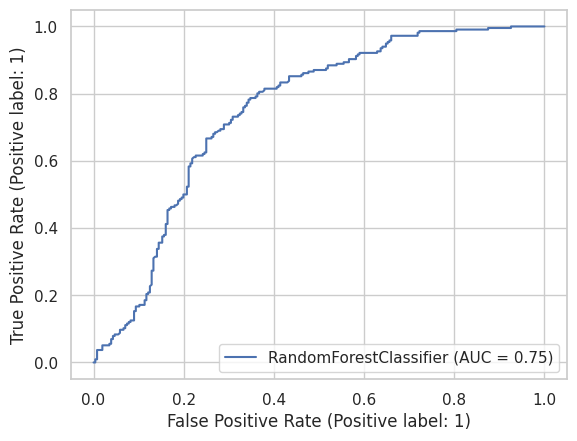

In [ ]:
#AAC ROC curve
RocCurveDisplay.from_estimator(rf, aac_x_test, aac_y_test)

In [ ]:
#Calculating AAC statistics
accuracy_score(aac_y_test, aac_y_test_pred)

0.7076271186440678

In [ ]:
matthews_corrcoef(aac_y_test,aac_y_test_pred)

0.40987836321052035

In [ ]:
confusion_matrix(aac_y_test,aac_y_test_pred)

array([[190,  66],
       [ 72, 144]])

In [ ]:
aac_report = classification_report(aac_y_train, aac_y_train_pred, target_names=['positive','negative'])
f = open('aac_report.txt','w')
f.write(aac_report)
f.close()
aac_report

'              precision    recall  f1-score   support\n\n    positive       0.96      0.92      0.94      1024\n    negative       0.91      0.96      0.93       861\n\n    accuracy                           0.94      1885\n   macro avg       0.94      0.94      0.94      1885\nweighted avg       0.94      0.94      0.94      1885\n'

In [ ]:
#AAC Feature importance

#Feature importance of rf model
aac_importance = pd.Series(rf.feature_importances_, name= 'Gini')

#Obtain feature names
aac_feat_names = pd.Series(aac_x2.columns, name = 'Feature')

#Combine feature names and Gini value into df
aac_feat_gini = pd.concat([aac_feat_names,aac_importance], axis = 1, names = ['Feature', 'Gini'])
aac_feat_gini

,Feature,Gini
0,AAC_A,0.050655
1,AAC_C,0.040354
2,AAC_D,0.089194
3,AAC_E,0.068024
4,AAC_F,0.044462
5,AAC_G,0.052791
6,AAC_H,0.024966
7,AAC_I,0.053417
8,AAC_K,0.092864
9,AAC_L,0.069803


Text(0.5, 0, 'Feature Importance')

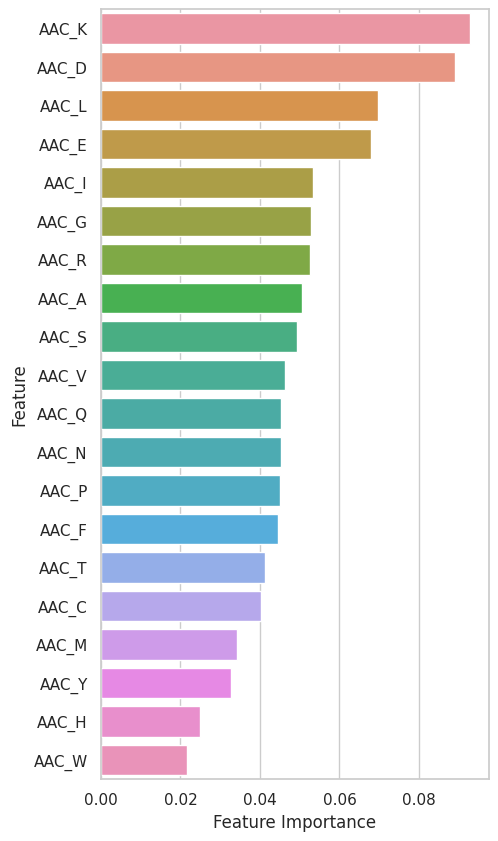

In [ ]:
#Plot of AAC feature importance
sorted_aac = aac_feat_gini.sort_values('Gini', ascending=False) #Gini in descending order

plt.figure(figsize=(5,10))
sns.set_theme(style='whitegrid')
ax = sns.barplot(x = 'Gini', y = 'Feature', data = sorted_aac)
plt.xlabel("Feature Importance")

In [ ]:
#Splitting DPC data 80/20
dpc_x_train, dpc_x_test, dpc_y_train, dpc_y_test= train_test_split(dpc_x2, dpc_y, test_size = 0.2, random_state = 42, stratify=dpc_y)

In [ ]:
#DPC predictions
rf.fit(dpc_x_train, dpc_y_train)
dpc_y_train_pred = rf.predict(dpc_x_train)
dpc_y_test_pred = rf.predict(dpc_x_test)

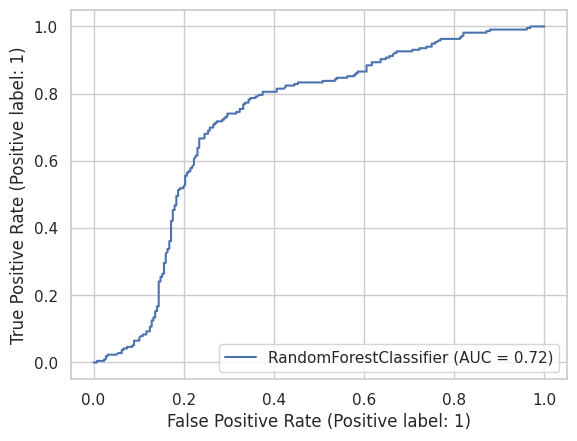

In [ ]:
#DPC ROC curve
RocCurveDisplay.from_estimator(rf, dpc_x_test, dpc_y_test)

In [ ]:
#Calculating DPC statistics
accuracy_score(dpc_y_test, dpc_y_test_pred)

0.7203389830508474

In [ ]:
matthews_corrcoef(dpc_y_test, dpc_y_test_pred)

0.43555015029058475

In [ ]:
confusion_matrix(dpc_y_test, dpc_y_test_pred)

array([[193,  63],
       [ 69, 147]])

In [ ]:
dpc_report = classification_report(dpc_y_train, dpc_y_train_pred, target_names=['positive','negative'])
f = open('dpc_report.txt','w')
f.write(dpc_report)
f.close()
dpc_report

'              precision    recall  f1-score   support\n\n    positive       0.96      0.92      0.94      1024\n    negative       0.91      0.96      0.93       861\n\n    accuracy                           0.94      1885\n   macro avg       0.94      0.94      0.94      1885\nweighted avg       0.94      0.94      0.94      1885\n'

In [ ]:
#DPC Feature importance

#Feature importance of rf model
dpc_importance = pd.Series(rf.feature_importances_, name= 'Gini')

#Obtain feature names
dpc_feat_names = pd.Series(dpc_x2.columns, name = 'Feature')

#Combine feature names and Gini value into df
dpc_feat_gini = pd.concat([dpc_feat_names,dpc_importance], axis = 1, names = ['Feature', 'Gini'])
dpc_feat_gini

,Feature,Gini
0,DPC1_AA,0.005753
1,DPC1_AC,0.002493
2,DPC1_AD,0.006193
3,DPC1_AE,0.002739
4,DPC1_AF,0.001899
...,...,...
393,DPC1_YS,0.001266
394,DPC1_YT,0.001422
395,DPC1_YV,0.000908
396,DPC1_YW,0.000156


Text(0.5, 0, 'Feature Importance')

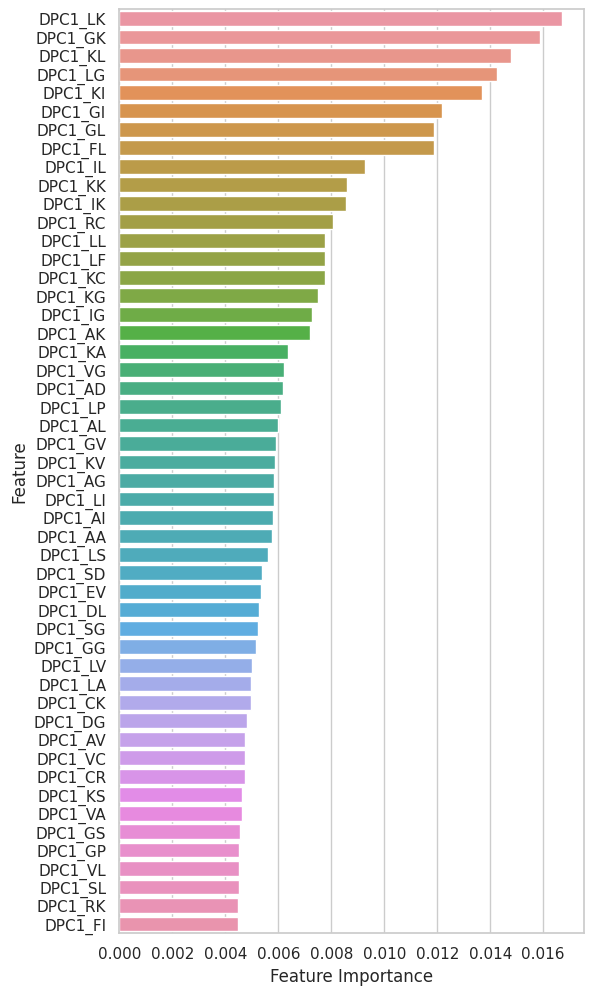

In [ ]:
#Plot of DPC feature importance
sorted_dpc = dpc_feat_gini.sort_values('Gini', ascending=False)[:50] #Top 50 Gini in descending order

plt.figure(figsize=(6,12))
sns.set_theme(style='whitegrid')
ax = sns.barplot(x = 'Gini', y = 'Feature', data = sorted_dpc)
plt.xlabel("Feature Importance")